In [1071]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor

In [1072]:
data=pd.read_fwf('data-01')
# print(data)
data[['Date','Time','Category','Target']] = data['Date\tTime\tCategory\tTarget'].str.split('\t',expand=True)
data.drop(columns=['Date\tTime\tCategory\tTarget'], inplace = True)
data

Date      Time Category Target
0    27-03-1988  08:00:00       58    134
1    27-03-1988  08:00:00       34     20
2    27-03-1988  12:00:00       60    158
3    27-03-1988  18:00:00       62    258
4    28-03-1988  08:00:00       58    115
..          ...       ...      ...    ...
395  27-07-1988  08:00:00       58    139
396  27-07-1988  08:00:00       34     12
397  27-07-1988  12:00:00       60    107
398  27-07-1988  18:00:00       62    102
399  28-07-1988  08:00:00       58     73

[400 rows x 4 columns]

In [1073]:
# Define a function to split the time string and convert to integers
def split_time(time_str):
    hours_str, minutes_str, seconds_str = time_str.split(':')
    hours = (hours_str)
    minutes = (minutes_str)
    seconds = (seconds_str)
    return hours, minutes, seconds

# Apply the function to the Time column of the DataFrame
data[['Hours', 'Minutes','Seconds']] = data['Time'].apply(lambda x: pd.Series(split_time(x)))


def split_date(date_str):
    date_str, month_str, year_str = date_str.split('-')
    date = (date_str)
    month = (month_str)
    year = (year_str)
    return date, month, year

# Apply the function to the Time column of the DataFrame
data[['date', 'Month','year']] = data['Date'].apply(lambda x: pd.Series(split_date(x)))

# Print the result
print(data)

           Date      Time Category Target Hours Minutes Seconds date Month  \
0    27-03-1988  08:00:00       58    134    08      00      00   27    03   
1    27-03-1988  08:00:00       34     20    08      00      00   27    03   
2    27-03-1988  12:00:00       60    158    12      00      00   27    03   
3    27-03-1988  18:00:00       62    258    18      00      00   27    03   
4    28-03-1988  08:00:00       58    115    08      00      00   28    03   
..          ...       ...      ...    ...   ...     ...     ...  ...   ...   
395  27-07-1988  08:00:00       58    139    08      00      00   27    07   
396  27-07-1988  08:00:00       34     12    08      00      00   27    07   
397  27-07-1988  12:00:00       60    107    12      00      00   27    07   
398  27-07-1988  18:00:00       62    102    18      00      00   27    07   
399  28-07-1988  08:00:00       58     73    08      00      00   28    07   

     year  
0    1988  
1    1988  
2    1988  
3    1988  
4  

In [1074]:
# concatenating the DataFrames
det = pd.concat([data['Hours'], data['Minutes']], join = 'outer', axis = 1)

# displaying the DataFrame
# print(det)
data=data.drop(['Date','Time'], axis=1)
print(data)
data['time'] = (data['Hours'].astype(int)*60) + data['Minutes'].astype(int)
data['target'] = data['Target']
data=data.drop(['Hours','Minutes','Seconds','Target'], axis=1)
data=data.drop(['date','year'], axis=1)
data['month']=data['Month']
data['Target']=data['target']
data=data.drop(['Month','target'],axis=1)
print(data)


    Category Target Hours Minutes Seconds date Month  year
0         58    134    08      00      00   27    03  1988
1         34     20    08      00      00   27    03  1988
2         60    158    12      00      00   27    03  1988
3         62    258    18      00      00   27    03  1988
4         58    115    08      00      00   28    03  1988
..       ...    ...   ...     ...     ...  ...   ...   ...
395       58    139    08      00      00   27    07  1988
396       34     12    08      00      00   27    07  1988
397       60    107    12      00      00   27    07  1988
398       62    102    18      00      00   27    07  1988
399       58     73    08      00      00   28    07  1988

[400 rows x 8 columns]
    Category  time month Target
0         58   480    03    134
1         34   480    03     20
2         60   720    03    158
3         62  1080    03    258
4         58   480    03    115
..       ...   ...   ...    ...
395       58   480    07    139
396       34

In [1075]:
X = data.iloc[:, 0:3].values
y = data.iloc[:, -1].values
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# print(X_train)


In [1076]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [1077]:
X_train.shape

(320, 3)

In [1078]:
# Initialize the SGDRegressor with desired hyperparameters
# regressor = SGDRegressor(loss='squared_error', penalty='l2', max_iter=1000, tol=1e-3)
regressor = SGDRegressor(penalty='l2', alpha = 0.1)
# Train the model with initial data using fit method
regressor.fit(X_train, y_train) 

# Taking the predicted values for the Test values
y_pred_sgd=regressor.predict(X_test)

# Calculation of Accuracy of the model
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2 score:', r2)

MSE: 0.34603893439938
RMSE: 0.5882507410954788
MAE: 0.37175228106249286
R2 score: 0.6727752175521566


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Predicting for a value

In [1079]:
X_p = np.array([[58.0,480.0,3.0]]).reshape(3, 1)
print(X_p.shape)
X_p = sc.transform(X_p)
print(X_p.shape)
y_pred= regressor.predict(X_p.reshape(1 , 3))
y_pred= y_pred.reshape(1,-1)
# Reverse the scaling of predicted values
y_pred = sc.inverse_transform(y_pred)
print(y_pred)

(3, 1)
(3, 1)
[[183.36135603]]


# Lifelong Learning

c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-02
[['34' 480 '07']
 ['60' 720 '07']
 ['62' 1080 '07']
 ...
 ['33' 480 '10']
 ['34' 480 '10']
 ['58' 480 '10']]
data-03
[['34' 480 '10']
 ['60' 720 '10']
 ['33' 720 '10']
 ['60' 720 '10']
 ['62' 1080 '10']
 ['33' 1080 '10']
 ['62' 1080 '10']
 ['48' 1320 '10']
 ['48' 1320 '10']
 ['58' 480 '10']
 ['33' 480 '10']
 ['34' 480 '10']
 ['60' 720 '10']
 ['33' 720 '10']
 ['62' 1080 '10']
 ['33' 1080 '10']
 ['48' 1320 '10']
 ['58' 480 '10']
 ['33' 480 '10']
 ['34' 480 '10']
 ['58' 480 '10']
 ['34' 480 '10']
 ['60' 720 '10']
 ['33' 720 '10']
 ['60' 720 '10']
 ['62' 1080 '10']
 ['33' 1080 '10']
 ['62' 1080 '10']
 ['48' 1320 '10']
 ['48' 1320 '10']
 ['58' 480 '10']
 ['34' 480 '10']
 ['60' 720 '10']
 ['62' 1080 '10']
 ['48' 1320 '10']
 ['58' 480 '10']
 ['34' 480 '10']
 ['60' 720 '10']
 ['62' 1080 '10']
 ['48' 1320 '10']
 ['58' 480 '10']
 ['33' 480 '10']
 ['34' 480 '10']
 ['58' 480 '10']
 ['34' 480 '10']
 ['60' 720 '10']
 ['33' 720 '10']
 ['60' 720 '10']
 ['62' 1080 '10']
 ['33' 1080 '10']
 ['62'

c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-04
[['33' 720 '01']
 ['62' 1080 '01']
 ['33' 1080 '01']
 ...
 ['34' 420 '03']
 ['58' 480 '03']
 ['33' 480 '03']]
data-05
[['34' 480 '03']
 ['58' 480 '03']
 ['33' 480 '03']
 ...
 ['48' 1320 '03']
 ['48' 1320 '03']
 ['48' 1320 '03']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-06
[['58' 480 '03']
 ['33' 480 '03']
 ['34' 480 '03']
 ...
 ['35' 480 '04']
 ['58' 480 '04']
 ['33' 480 '04']]
data-07


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['34' 480 '04']
 ['60' 720 '04']
 ['33' 720 '04']
 ...
 ['60' 720 '04']
 ['33' 720 '04']
 ['62' 1080 '04']]
data-08
[['33' 1080 '04']
 ['62' 1080 '04']
 ['33' 1080 '04']
 ...
 ['62' 1095 '05']
 ['33' 1095 '05']
 ['48' 1320 '05']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-09
[['48' 1320 '05']
 ['33' 1320 '05']
 ['48' 1365 '05']
 ...
 ['58' 490 '05']
 ['33' 490 '05']
 ['35' 490 '05']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-10
[['60' 720 '05']
 ['33' 720 '05']
 ['60' 720 '05']
 ...
 ['35' 480 '06']
 ['60' 720 '06']
 ['33' 720 '06']]
data-11


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['60' 720 '06']
 ['33' 720 '06']
 ['62' 960 '06']
 ...
 ['48' 1370 '07']
 ['48' 1380 '07']
 ['65' 90 '07']]
data-12
[['67' 90 '07']
 ['58' 400 '07']
 ['33' 400 '07']
 ...
 ['33' 930 '08']
 ['62' 1160 '08']
 ['33' 1160 '08']]
data-13


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['48' 1380 '08']
 ['67' 1380 '08']
 ['58' 530 '08']
 ...
 ['48' 1320 '09']
 ['33' 1320 '09']
 ['58' 480 '09']]
data-14
[['33' 480 '09']
 ['34' 480 '09']
 ['33' 720 '09']
 ...
 ['33' 480 '10']
 ['58' 480 '10']
 ['33' 480 '10']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-15
[['34' 480 '10']
 ['60' 690 '10']
 ['33' 690 '10']
 ...
 ['33' 720 '10']
 ['62' 1080 '10']
 ['33' 1080 '10']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-16
[['62' 1080 '10']
 ['33' 1080 '10']
 ['34' 1080 '10']
 ...
 ['57' 720 '11']
 ['66' 720 '11']
 ['33' 735 '11']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-17
[['62' 1020 '11']
 ['33' 1020 '11']
 ['33' 1065 '11']
 ...
 ['33' 1080 '12']
 ['48' 1320 '12']
 ['33' 1320 '12']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-18
[['48' 1410 '12']
 ['58' 450 '12']
 ['33' 450 '12']
 ...
 ['33' 1080 '01']
 ['48' 1320 '01']
 ['33' 1320 '01']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-19


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['48' 1380 '01']
 ['58' 450 '01']
 ['33' 450 '01']
 ...
 ['33' 420 '02']
 ['34' 420 '02']
 ['57' 420 '02']]
data-20
[['60' 780 '02']
 ['33' 780 '02']
 ['57' 1050 '02']
 ...
 ['60' 689 '04']
 ['33' 691 '04']
 ['62' 1129 '04']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-21
[['64' 41 '04']
 ['34' 43 '04']
 ['33' 43 '04']
 ...
 ['60' 750 '05']
 ['33' 750 '05']
 ['62' 1050 '05']]
data-22
[['33' 1050 '05']
 ['48' 1290 '05']
 ['58' 420 '05']
 ...
 ['57' 442 '07']
 ['56' 714 '07']
 ['57' 717 '07']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-23
[['57' 852 '07']
 ['60' 870 '07']
 ['33' 870 '07']
 ...
 ['60' 697 '07']
 ['60' 710 '07']
 ['60' 720 '07']]
data-24
[['33' 720 '07']
 ['60' 760 '07']
 ['60' 818 '07']
 ...
 ['33' 459 '07']
 ['34' 459 '07']
 ['56' 460 '07']]
data-25


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['58' 463 '07']
 ['67' 465 '07']
 ['33' 465 '07']
 ...
 ['63' 1268 '08']
 ['33' 1271 '08']
 ['34' 1271 '08']]
data-26
[['65' 1292 '08']
 ['57' 1292 '08']
 ['63' 1313 '08']
 ...
 ['58' 439 '08']
 ['58' 439 '08']
 ['57' 460 '08']]
data-27


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['33' 1380 '08']
 ['34' 1380 '08']
 ['48' 1380 '08']
 ...
 ['60' 696 '08']
 ['60' 713 '08']
 ['60' 714 '08']]
data-28
[['33' 714 '08']
 ['72' 715 '08']
 ['60' 728 '08']
 ...
 ['58' 418 '08']
 ['33' 420 '08']
 ['58' 438 '08']]
data-30


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['60' 713 '08']
 ['33' 715 '08']
 ['60' 720 '08']
 ...
 ['60' 750 '08']
 ['33' 750 '08']
 ['60' 756 '08']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-31
[['60' 756 '08']
 ['60' 760 '08']
 ['60' 760 '08']
 ...
 ['34' 406 '09']
 ['58' 430 '09']
 ['33' 433 '09']]
data-32
[['34' 433 '09']
 ['58' 443 '09']
 ['33' 444 '09']
 ...
 ['33' 385 '09']
 ['34' 385 '09']
 ['58' 429 '09']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-33
[['33' 431 '09']
 ['34' 431 '09']
 ['58' 441 '09']
 ...
 ['33' 960 '09']
 ['62' 976 '09']
 ['62' 1029 '09']]
data-34
[['33' 1031 '09']
 ['34' 1031 '09']
 ['62' 1038 '09']
 ...
 ['33' 1227 '09']
 ['34' 1227 '09']
 ['33' 1227 '09']]
data-35
[['34' 1227 '09']
 ['64' 1229 '09']
 ['64' 1229 '09']
 ...
 ['62' 1009 '09']
 ['33' 1011 '09']
 ['33' 1011 '09']]
data-36


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['62' 1020 '09']
 ['33' 1020 '09']
 ['65' 1028 '09']
 ...
 ['34' 438 '09']
 ['58' 461 '09']
 ['58' 463 '09']]
data-37
[['33' 463 '09']
 ['34' 463 '09']
 ['33' 464 '09']
 ...
 ['58' 400 '09']
 ['33' 400 '09']
 ['35' 400 '09']]
data-38


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['58' 440 '09']
 ['67' 442 '09']
 ['58' 460 '09']
 ...
 ['33' 718 '10']
 ['60' 719 '10']
 ['60' 720 '10']]
data-39
[['33' 720 '10']
 ['60' 723 '10']
 ['33' 725 '10']
 ...
 ['33' 1054 '10']
 ['34' 1054 '10']
 ['62' 1080 '10']]
data-40


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['33' 1080 '10']
 ['63' 1250 '10']
 ['33' 1253 '10']
 ...
 ['33' 720 '12']
 ['62' 1080 '12']
 ['33' 1080 '12']]
data-41
[['48' 1320 '12']
 ['58' 480 '12']
 ['33' 480 '12']
 ...
 ['33' 1100 '01']
 ['48' 1320 '01']
 ['34' 1320 '01']]
data-42


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['48' 1350 '01']
 ['48' 1350 '01']
 ['58' 395 '01']
 ...
 ['62' 1110 '01']
 ['33' 1110 '01']
 ['62' 1140 '01']]
data-43
[['33' 1140 '01']
 ['48' 1320 '01']
 ['48' 1320 '01']
 ...
 ['48' 1320 '02']
 ['48' 1320 '02']
 ['34' 1320 '02']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-44
[['48' 1365 '02']
 ['58' 420 '02']
 ['33' 420 '02']
 ...
 ['48' 1320 '03']
 ['48' 1320 '03']
 ['48' 1345 '03']]
data-45
[['58' 395 '03']
 ['33' 395 '03']
 ['34' 395 '03']
 ...
 ['57' 530 '03']
 ['33' 534 '03']
 ['35' 534 '03']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-46
[['60' 720 '03']
 ['33' 720 '03']
 ['60' 720 '03']
 ['33' 720 '03']
 ['57' 1078 '03']
 ['33' 1080 '03']
 ['35' 1080 '03']
 ['62' 1080 '03']
 ['33' 1080 '03']
 ['62' 1080 '03']
 ['33' 1080 '03']
 ['64' 1315 '03']
 ['34' 1316 '03']
 ['70' 1316 '03']
 ['48' 1320 '03']
 ['48' 1320 '03']
 ['58' 400 '03']
 ['33' 400 '03']
 ['34' 400 '03']
 ['58' 420 '03']
 ['33' 420 '03']
 ['34' 420 '03']
 ['58' 424 '03']
 ['33' 426 '03']
 ['34' 426 '03']
 ['66' 427 '03']
 ['69' 427 '03']
 ['57' 444 '03']
 ['33' 446 '03']
 ['35' 446 '03']
 ['58' 480 '03']
 ['33' 480 '03']
 ['35' 480 '03']
 ['60' 720 '03']
 ['33' 720 '03']
 ['60' 720 '03']
 ['33' 720 '03']
 ['60' 730 '03']
 ['33' 730 '03']
 ['57' 1067 '03']
 ['33' 1069 '03']
 ['35' 1069 '03']
 ['62' 1080 '03']
 ['33' 1080 '03']
 ['62' 1080 '03']
 ['33' 1080 '03']
 ['62' 1088 '03']
 ['33' 1089 '03']
 ['34' 1089 '03']
 ['66' 1090 '03']
 ['69' 1090 '03']
 ['72' 1090 '03']
 ['62' 1105 '03']
 ['33' 1105 '03']
 ['64' 1261 '03']
 ['33' 1263 '03']
 ['34' 1263

c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-48
[['60' 720 '04']
 ['33' 720 '04']
 ['60' 730 '04']
 ['33' 730 '04']
 ['62' 970 '04']
 ['33' 972 '04']
 ['62' 1032 '04']
 ['33' 1033 '04']
 ['34' 1033 '04']
 ['62' 1080 '04']
 ['33' 1080 '04']
 ['62' 1080 '04']
 ['33' 1080 '04']
 ['62' 1083 '04']
 ['62' 1105 '04']
 ['33' 1105 '04']
 ['57' 1180 '04']
 ['33' 1182 '04']
 ['35' 1182 '04']
 ['64' 1226 '04']
 ['34' 1228 '04']
 ['63' 1274 '04']
 ['33' 1277 '04']
 ['34' 1277 '04']
 ['48' 1320 '04']
 ['48' 1320 '04']
 ['33' 1320 '04']
 ['48' 1320 '04']
 ['64' 1323 '04']
 ['71' 1325 '04']
 ['58' 300 '04']
 ['58' 340 '04']
 ['34' 342 '04']
 ['58' 395 '04']
 ['33' 395 '04']
 ['34' 395 '04']
 ['58' 413 '04']
 ['33' 414 '04']
 ['34' 414 '04']
 ['33' 416 '04']
 ['34' 416 '04']
 ['67' 416 '04']
 ['58' 428 '04']
 ['57' 441 '04']
 ['33' 443 '04']
 ['35' 443 '04']
 ['58' 480 '04']
 ['33' 480 '04']
 ['34' 480 '04']
 ['58' 480 '04']
 ['33' 480 '04']
 ['35' 480 '04']
 ['60' 672 '04']
 ['71' 674 '04']
 ['33' 674 '04']
 ['65' 695 '04']
 ['60' 719 '04']

c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-50
[['58' 314 '09']
 ['33' 316 '09']
 ['58' 336 '09']
 ['34' 338 '09']
 ['58' 347 '09']
 ['67' 349 '09']
 ['33' 349 '09']
 ['35' 349 '09']
 ['33' 366 '09']
 ['34' 366 '09']
 ['58' 427 '09']
 ['33' 431 '09']
 ['33' 453 '09']
 ['58' 453 '09']
 ['34' 453 '09']
 ['57' 453 '09']
 ['33' 455 '09']
 ['34' 455 '09']
 ['58' 480 '09']
 ['33' 480 '09']
 ['34' 480 '09']
 ['58' 480 '09']
 ['33' 480 '09']
 ['35' 480 '09']
 ['58' 525 '09']
 ['33' 526 '09']
 ['34' 526 '09']
 ['60' 686 '09']
 ['60' 709 '09']
 ['60' 716 '09']
 ['33' 718 '09']
 ['33' 720 '09']
 ['60' 720 '09']
 ['33' 720 '09']
 ['60' 720 '09']
 ['33' 720 '09']
 ['68' 738 '09']
 ['64' 933 '09']
 ['62' 983 '09']
 ['33' 985 '09']
 ['33' 1032 '09']
 ['34' 1032 '09']
 ['62' 1071 '09']
 ['33' 1074 '09']
 ['35' 1074 '09']
 ['33' 1080 '09']
 ['62' 1080 '09']
 ['33' 1080 '09']
 ['62' 1080 '09']
 ['33' 1080 '09']
 ['62' 1087 '09']
 ['33' 1088 '09']
 ['57' 1148 '09']
 ['33' 1149 '09']
 ['34' 1149 '09']
 ['64' 1231 '09']
 ['34' 1233 '09']
 ['64'

c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-53
[['33' 1049 '04']
 ['34' 1049 '04']
 ['62' 1080 '04']
 ...
 ['34' 1404 '05']
 ['65' 180 '05']
 ['58' 350 '05']]
data-54
[['58' 350 '05']
 ['34' 352 '05']
 ['34' 352 '05']
 ...
 ['68' 672 '05']
 ['59' 707 '05']
 ['33' 709 '05']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-55
[['33' 710 '05']
 ['60' 710 '05']
 ['60' 720 '05']
 ...
 ['60' 720 '05']
 ['33' 720 '05']
 ['65' 750 '05']]
data-56
[['62' 960 '05']
 ['62' 994 '05']
 ['33' 995 '05']
 ...
 ['33' 720 '05']
 ['60' 720 '05']
 ['33' 720 '05']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-57
[['60' 730 '05']
 ['33' 730 '05']
 ['61' 941 '05']
 ...
 ['33' 1050 '05']
 ['62' 1074 '05']
 ['62' 1080 '05']]
data-58
[['33' 1080 '05']
 ['62' 1080 '05']
 ['33' 1080 '05']
 ...
 ['33' 844 '05']
 ['65' 844 '05']
 ['62' 1033 '05']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-59
[['33' 1033 '05']
 ['62' 1042 '05']
 ['63' 1071 '05']
 ...
 ['34' 1251 '06']
 ['64' 1315 '06']
 ['33' 1317 '06']]
data-60
[['48' 1320 '06']
 ['48' 1320 '06']
 ['48' 1320 '06']
 ...
 ['33' 720 '06']
 ['60' 765 '06']
 ['33' 765 '06']]
data-61
[['60' 796 '06']
 ['33' 796 '06']
 ['65' 960 '06']
 ...
 ['62' 1101 '06']
 ['33' 1106 '06']
 ['34' 1106 '06']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-62
[['57' 1109 '06']
 ['62' 1110 '06']
 ['33' 1110 '06']
 ...
 ['34' 545 '06']
 ['58' 560 '06']
 ['33' 562 '06']]
data-63
[['34' 562 '06']
 ['60' 709 '06']
 ['33' 710 '06']
 ...
 ['62' 1080 '06']
 ['33' 1080 '06']
 ['62' 1080 '06']]
data-64


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['33' 1080 '06']
 ['62' 1082 '06']
 ['33' 1103 '06']
 ...
 ['33' 1080 '07']
 ['62' 1085 '07']
 ['33' 1087 '07']]
data-65
[['34' 1087 '07']
 ['57' 1087 '07']
 ['33' 1108 '07']
 ...
 ['33' 347 '07']
 ['35' 347 '07']
 ['33' 352 '07']]
data-66


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

[['34' 352 '07']
 ['58' 370 '07']
 ['33' 370 '07']
 ...
 ['60' 713 '07']
 ['33' 715 '07']
 ['60' 720 '07']]
data-67
[['33' 720 '07']
 ['60' 720 '07']
 ['33' 720 '07']
 ...
 ['33' 1080 '07']
 ['62' 1080 '07']
 ['33' 1080 '07']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-68
[['62' 1080 '07']
 ['33' 1080 '07']
 ['62' 1080 '07']
 ...
 ['33' 1083 '08']
 ['33' 1257 '08']
 ['34' 1257 '08']]
data-69
[['64' 1264 '08']
 ['33' 1265 '08']
 ['48' 1320 '08']
 ...
 ['33' 1036 '08']
 ['62' 1040 '08']
 ['62' 1080 '08']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

data-70
[['33' 1080 '08']
 ['62' 1170 '08']
 ['33' 1170 '08']
 ...
 ['33' 1035 '09']
 ['48' 1270 '09']
 ['33' 1270 '09']]


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

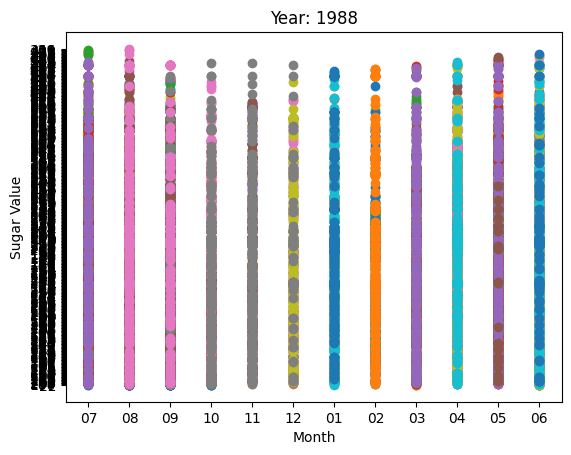

In [1080]:
for i in range(2,71):
    if(i<=9):
        data=pd.read_fwf('data-0'+str(i))
    elif(i != 29 and i != 51):
        data=pd.read_fwf('data-'+str(i))
    else:
        continue

    # print(data)
    data[['Date','Time','Category','Target']] = data['Date\tTime\tCategory\tTarget'].str.split('\t',expand=True)
    
    data.drop(columns=['Date\tTime\tCategory\tTarget'], inplace = True)
    
    def split_time(time_str):
        hours_str, minutes_str, seconds_str = time_str.split(':')
        hours = (hours_str)
        minutes = (minutes_str)
        seconds = (seconds_str)
    
        return hours, minutes, seconds
    #Apply the function to the Time column of the DataFrame
    data[['Hours', 'Minutes','Seconds']] = data['Time'].apply(lambda x: pd.Series(split_time(x)))
    
    data=data.drop(['Time'], axis=1)
    # print(data)
    data['time'] = (data['Hours'].astype(int)*60) + data['Minutes'].astype(int)
    # print(data)
    
    data=data.drop(['Hours','Minutes','Seconds'], axis=1)
    if(i<=9):
        print('data-0'+str(i))
    else:
        print('data-'+str(i))
    # print(data)
    def split_date(date_str):
        date_str, month_str, year_str = date_str.split('-')
        date = (date_str)
        month = (month_str)
        year = (year_str)
        return date, month, year

    # Apply the function to the Time column of the DataFrame
    data[['date', 'Month','year']] = data['Date'].apply(lambda x: pd.Series(split_date(x)))
    data['month']=data['Month']
    data=data.drop(['Date','date','year','Month'],axis=1)
    data['target'] = data['Target']
    data=data.drop(['Target'],axis=1)



    # Print the result
    # print(data)
    data=data.dropna()
    # plt.figure()
    plt.scatter(data['month'],data['target'] )
    plt.title('Year: 1988')
    plt.xlabel('Month')
    plt.ylabel('Sugar Value')
    
    X_new = data.iloc[:, 0:-1].values
    y_new = data.iloc[:, -1].values
    y_new = y_new.reshape(-1,1)
    print(X_new)
    X_new = sc.fit_transform(X_new)
    y_new = sc.fit_transform(y_new)
    for j in range(len(X_new)):
        x_i = X_new[i].reshape(1, -1)
        y_i = y_new[i]
        # if(i==3 and data['month']==1):
        #     break
        regressor.partial_fit(x_i, [y_i])
    
    
    





# Predicting the same value after lifelong training

In [1081]:
X_p = np.array([[58.0,480.0,3.0]]).reshape(3, 1)
print(X_p.shape)

X_p = sc.transform(X_p)
print(X_p.shape)
y_pred= regressor.predict(X_p.reshape(1 , 3))
y_pred= y_pred.reshape(1,-1)
# Reverse the scaling of predicted values
y_pred = sc.inverse_transform(y_pred)
print(y_pred)

(3, 1)
(3, 1)
[[29.80021085]]
